In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
from math import sqrt

In [2]:
df = pd.read_csv('robberies.csv',parse_dates=True,index_col=0,header=0)

In [3]:
df

,Robberies
Month,
1966-01-01,41
1966-02-01,39
1966-03-01,50
1966-04-01,40
1966-05-01,43
...,...
1975-06-01,316
1975-07-01,398
1975-08-01,394


In [4]:
df.head()

,Robberies
Month,
1966-01-01,41
1966-02-01,39
1966-03-01,50
1966-04-01,40
1966-05-01,43


In [5]:
df.tail()

,Robberies
Month,
1975-06-01,316
1975-07-01,398
1975-08-01,394
1975-09-01,431
1975-10-01,431


In [6]:
df.isnull().sum()

Robberies    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 1966-01-01 to 1975-10-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Robberies  118 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [8]:
df.describe()

,Robberies
count,118.000000
mean,196.288136
std,128.043602
min,29.000000
25%,85.500000
50%,166.000000
75%,296.750000
max,500.000000


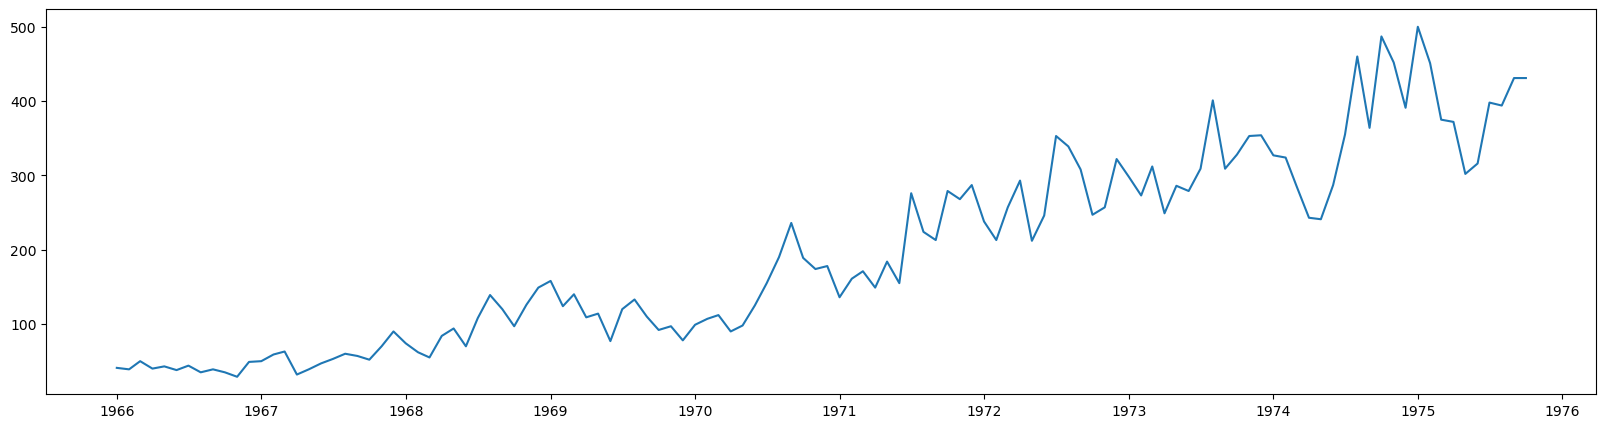

In [9]:
plt.figure(figsize=(20,5))
plt.plot(df)

<Axes: xlabel='Robberies', ylabel='Density'>

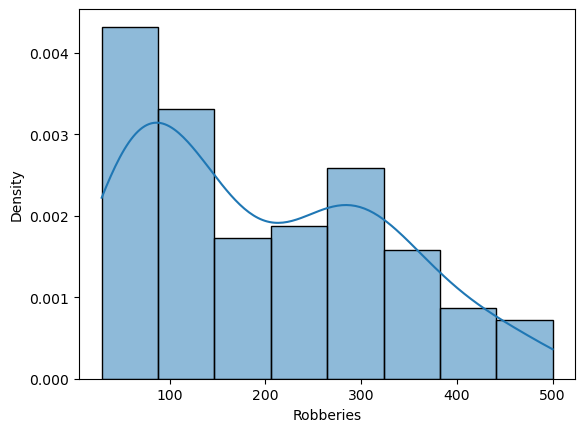

In [10]:
sns.histplot(df['Robberies'],kde=True,stat='density')

<Figure size 640x480 with 0 Axes>

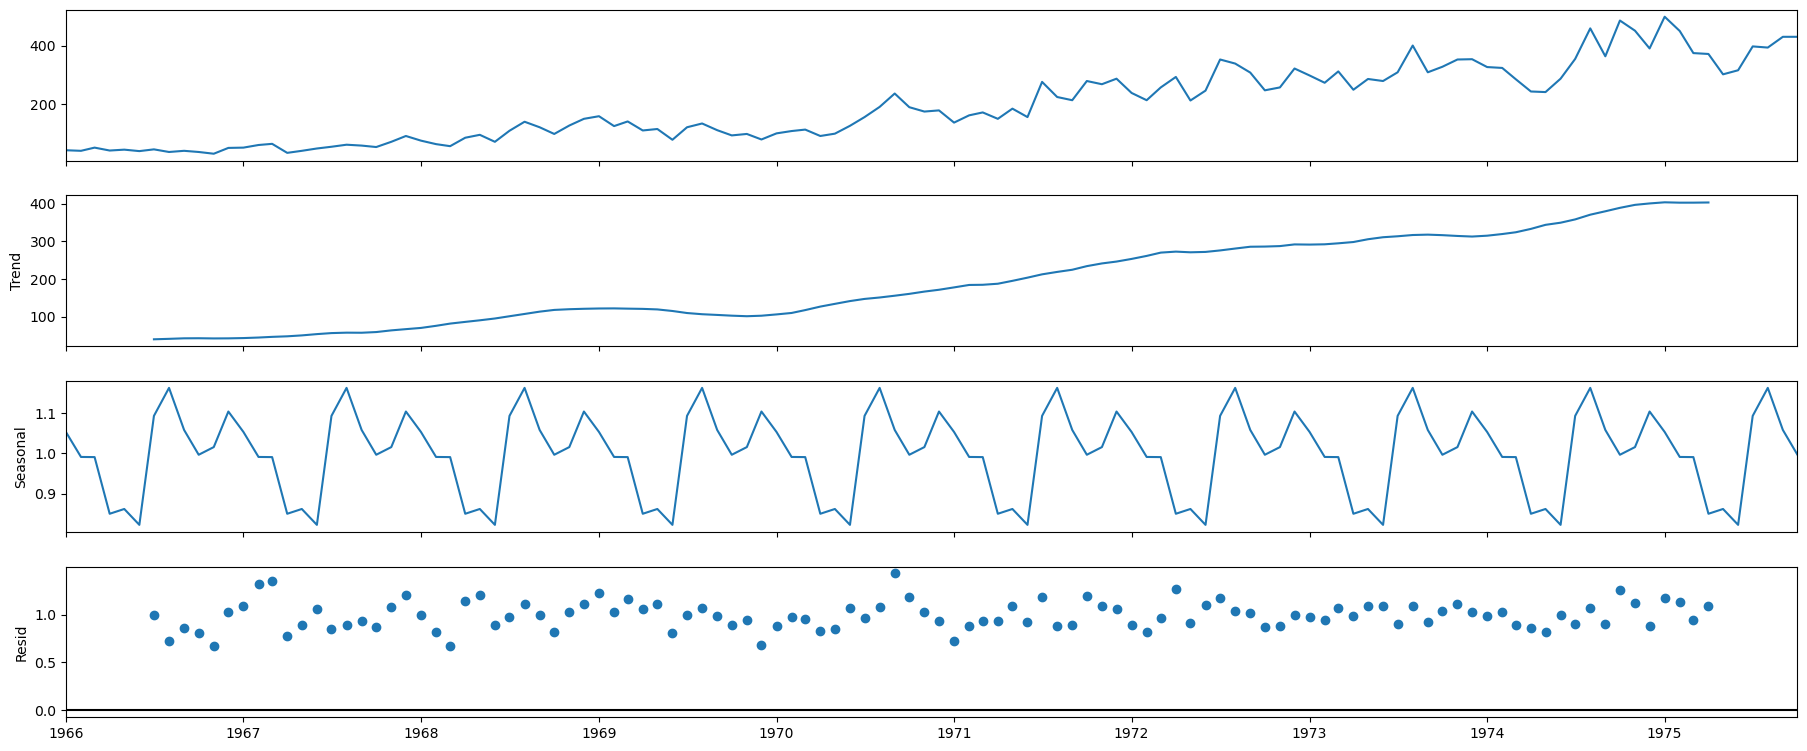

In [11]:
seasonal=seasonal_decompose(df,model='multiplicative',period=12)
fig=plt.figure()
fig=seasonal.plot()
fig.set_size_inches(20,8)

In [12]:
#REMOVING SEASONALITY

In [13]:
#log transform
log_df=df['Robberies'].apply(lambda x:np.log(x))

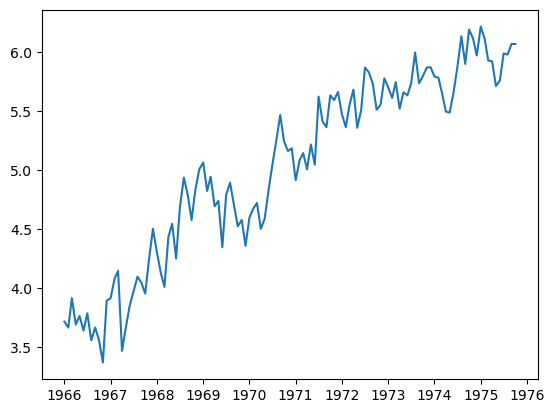

In [14]:

plt.plot(log_df)

<Figure size 640x480 with 0 Axes>

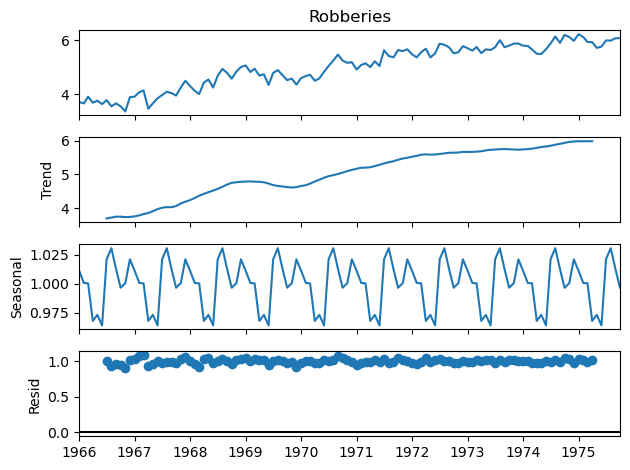

In [15]:
seasonal=seasonal_decompose(log_df,model='multiplicative',period=12)
fig=plt.figure()
fig=seasonal.plot()

In [16]:
#power traNSFORM

In [17]:
pow_df=df['Robberies'].apply(lambda x:x**0.5)

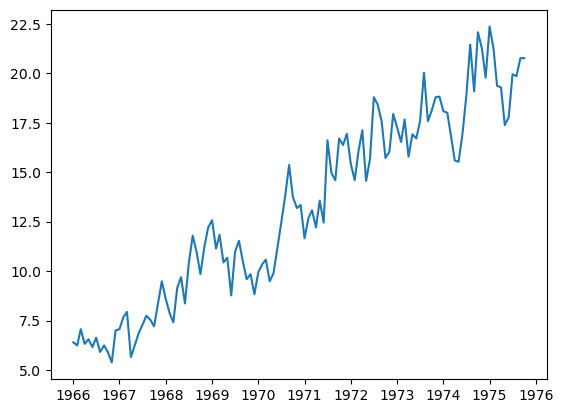

In [18]:
plt.plot(pow_df)

<Figure size 640x480 with 0 Axes>

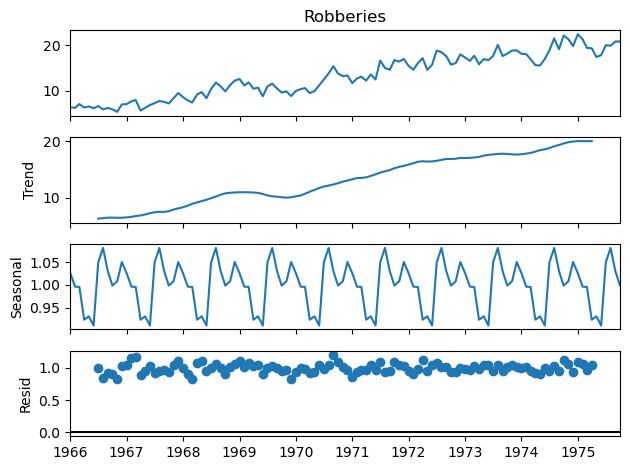

In [19]:
seasonal=seasonal_decompose(pow_df,model='multiplicative',period=12)
fig=plt.figure()
fig=seasonal.plot()


In [20]:
gr=STL(pow_df,seasonal=7)
hy=gr.fit()
fig=hy.plot()

NameError: name 'STL' is not defined

In [ ]:
#differencing

In [21]:
ld_df=log_df-log_df.shift()

In [22]:
ld_df

Month
1966-01-01         NaN
1966-02-01   -0.050010
1966-03-01    0.248461
1966-04-01   -0.223144
1966-05-01    0.072321
                ...   
1975-06-01    0.045315
1975-07-01    0.230710
1975-08-01   -0.010101
1975-09-01    0.089757
1975-10-01    0.000000
Name: Robberies, Length: 118, dtype: float64

In [23]:
rf=pd.DataFrame(ld_df)

In [24]:
rf

,Robberies
Month,
1966-01-01,NaN
1966-02-01,-0.050010
1966-03-01,0.248461
1966-04-01,-0.223144
1966-05-01,0.072321
...,...
1975-06-01,0.045315
1975-07-01,0.230710
1975-08-01,-0.010101


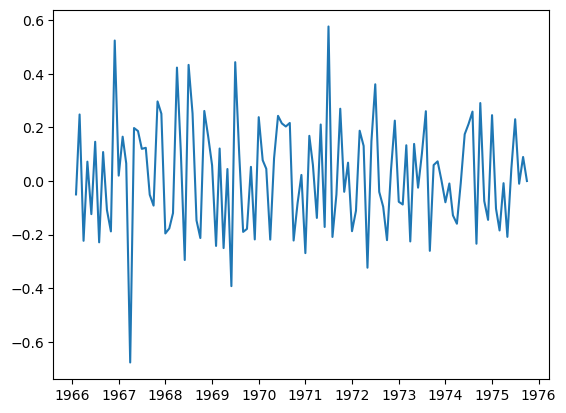

In [25]:
plt.plot(rf)

In [26]:
from statsmodels.tsa.seasonal import STL

In [27]:
sf=rf[1:]
sf

,Robberies
Month,
1966-02-01,-0.050010
1966-03-01,0.248461
1966-04-01,-0.223144
1966-05-01,0.072321
1966-06-01,-0.123614
...,...
1975-06-01,0.045315
1975-07-01,0.230710
1975-08-01,-0.010101


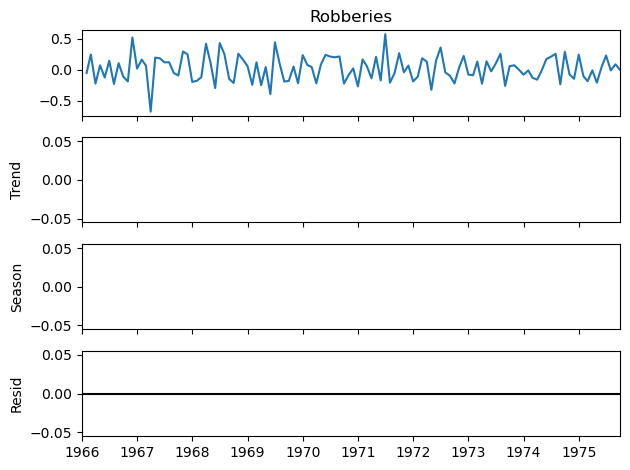

In [28]:
gr=STL(ld_df,seasonal=7)
hy=gr.fit()
fig=hy.plot()

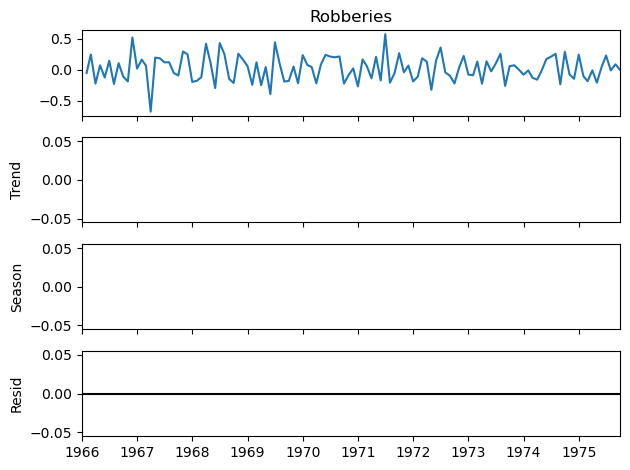

In [29]:
from statsmodels.tsa.seasonal import STL
res = STL(ld_df).fit()
res.plot()
plt.show()

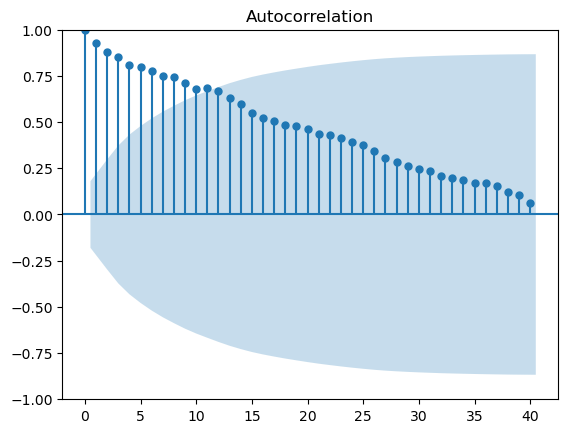

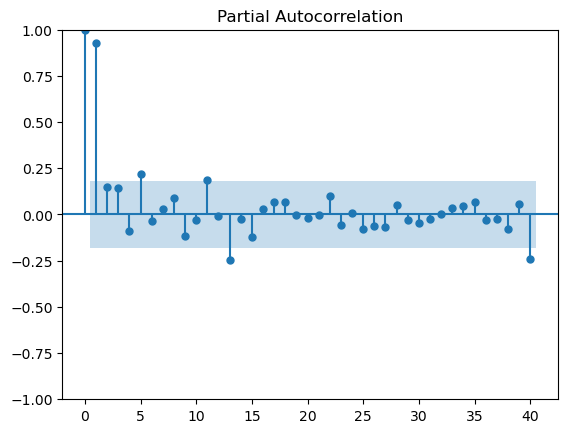

In [30]:
acf=plot_acf(df['Robberies'],lags=40)
pacf=plot_pacf(df['Robberies'],lags=40)

In [31]:
#we have removed the seasonality

In [32]:
#ADF TEST

In [33]:
from statsmodels.tsa.stattools import adfuller

def adf_check(time_series):
    
    #Pass in a time series, returns ADF report

    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary \n")
     

In [34]:
adf_check(df)

Augmented Dickey-Fuller Test:
ADF Test Statistic : 1.0011021402458182
p-value : 0.9942775638057234
Number of Lags Used : 11
Number of Observations Used : 106
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 



In [35]:
adf_check(rf.Robberies.dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.601792127269047
p-value : 2.378602441743682e-11
Number of Lags Used : 3
Number of Observations Used : 113
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [36]:
#AR MODEL

In [37]:
df = pd.read_csv('robberies.csv',parse_dates=True,index_col=0,header=0)
df1 = pd.DataFrame(df.groupby(df.index.strftime('%Y-%m')).sum()['Robberies'])
df1.columns=['Value']
     

In [38]:
df1

,Value
Month,
1966-01,41
1966-02,39
1966-03,50
1966-04,40
1966-05,43
...,...
1975-06,316
1975-07,398
1975-08,394


In [39]:
def AR(p,df):
  df_temp = df

  #Generating the lagged p terms
  for i in range(1,p+1):
    df_temp['Shifted_values_%d' % i ] = df_temp['Robberies'].shift(i)

  train_size = (int)(0.8 * df_temp.shape[0])

  #Breaking data set into test and training
  df_train = pd.DataFrame(df_temp[0:train_size])
  df_test = pd.DataFrame(df_temp[train_size:df.shape[0]])

  df_train_2 = df_train.dropna()
  #X contains the lagged values ,hence we skip the first column
  X_train = df_train_2.iloc[:,1:].values.reshape(-1,p)
  #Y contains the value,it is the first column
  y_train = df_train_2.iloc[:,0].values.reshape(-1,1)

  #Running linear regression to generate the coefficents of lagged terms
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # df_train_2[['Value','Predicted_Values']].plot()

  X_test = df_test.iloc[:,1:].values.reshape(-1,p)
  df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  # df_test[['Value','Predicted_Values']].plot()

  RMSE = np.sqrt(mean_squared_error(df_test['Robberies'], df_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of p : ",p)
  return [df_train_2,df_test,theta,intercept,RMSE]
     

In [40]:
for i in range(1,40):
  [df_train,df_test,theta,intercept,RMSE] = AR(i,pd.DataFrame(sf.Robberies))
  

The RMSE is : 0.1552421466007274 , Value of p :  1
The RMSE is : 0.15884504094898735 , Value of p :  2
The RMSE is : 0.1674458310505612 , Value of p :  3
The RMSE is : 0.16533197058084353 , Value of p :  4
The RMSE is : 0.16578969860458634 , Value of p :  5
The RMSE is : 0.16524468690353658 , Value of p :  6
The RMSE is : 0.1611187910688292 , Value of p :  7
The RMSE is : 0.16444636392565312 , Value of p :  8
The RMSE is : 0.1614780532169953 , Value of p :  9
The RMSE is : 0.15346940407000603 , Value of p :  10
The RMSE is : 0.14986065490137507 , Value of p :  11
The RMSE is : 0.14660308991914922 , Value of p :  12
The RMSE is : 0.1479543835630112 , Value of p :  13
The RMSE is : 0.14468539102029593 , Value of p :  14
The RMSE is : 0.1517844789430319 , Value of p :  15
The RMSE is : 0.15175698395806758 , Value of p :  16
The RMSE is : 0.15617887426421248 , Value of p :  17
The RMSE is : 0.15748305239668275 , Value of p :  18
The RMSE is : 0.15872691303833822 , Value of p :  19
The RMSE

C:\Users\user\AppData\Local\Temp\ipykernel_10256\759230186.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
C:\Users\user\AppData\Local\Temp\ipykernel_10256\759230186.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
C:\Users\user\AppData\Local\Temp\ipykernel_10256\759230186.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

The RMSE is : 0.16161757356139678 , Value of p :  25
The RMSE is : 0.15868214924325835 , Value of p :  26
The RMSE is : 0.14493902729225158 , Value of p :  27
The RMSE is : 0.15947366826678866 , Value of p :  28
The RMSE is : 0.16059105899700604 , Value of p :  29
The RMSE is : 0.1740181637654856 , Value of p :  30
The RMSE is : 0.1821606836720124 , Value of p :  31
The RMSE is : 0.17870091945714833 , Value of p :  32
The RMSE is : 0.18099405430419607 , Value of p :  33
The RMSE is : 0.1930660334211712 , Value of p :  34
The RMSE is : 0.1926812959831915 , Value of p :  35


C:\Users\user\AppData\Local\Temp\ipykernel_10256\759230186.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
C:\Users\user\AppData\Local\Temp\ipykernel_10256\759230186.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
C:\Users\user\AppData\Local\Temp\ipykernel_10256\759230186.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

The RMSE is : 0.18358679111217524 , Value of p :  36
The RMSE is : 0.20222519914004844 , Value of p :  37
The RMSE is : 0.22721719580382554 , Value of p :  38
The RMSE is : 0.23936518009554514 , Value of p :  39


In [41]:
[df_train,df_test,theta,intercept,RMSE] = AR(14,pd.DataFrame(sf.Robberies))

The RMSE is : 0.14468539102029593 , Value of p :  14


C:\Users\user\AppData\Local\Temp\ipykernel_10256\759230186.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


<Axes: xlabel='Month'>

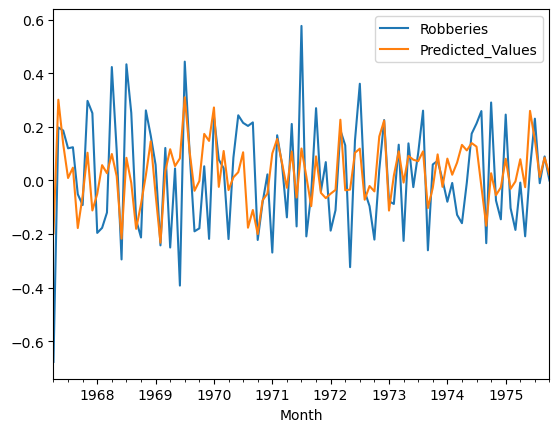

In [42]:
df2 = pd.concat([df_train,df_test])
df2[['Robberies','Predicted_Values']].plot()
     

In [43]:
res = pd.DataFrame()
res['Residuals'] = df2.Robberies - df2.Predicted_Values
     

In [44]:
res

,Residuals
Month,
1967-04-01,-0.479706
1967-05-01,-0.103740
1967-06-01,0.050629
1967-07-01,0.110921
1967-08-01,0.076239
...,...
1975-06-01,-0.214459
1975-07-01,0.079647
1975-08-01,-0.023327


<Axes: ylabel='Density'>

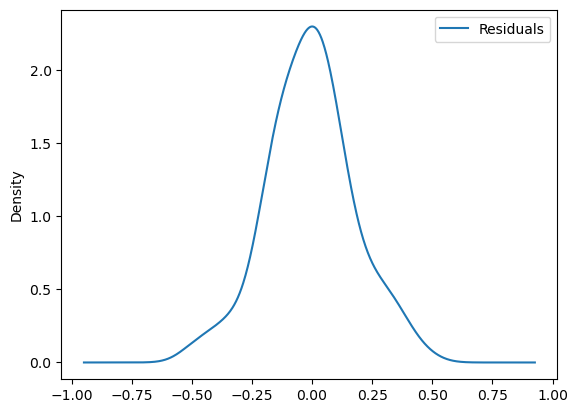

In [45]:
res.plot(kind='kde')

In [46]:
def MA(q,res):

  for i in range(1,q+1):
    res['Shifted_values_%d' % i ] = res['Residuals'].shift(i)

  train_size = (int)(0.8 * res.shape[0])

  res_train = pd.DataFrame(res[0:train_size])
  res_test = pd.DataFrame(res[train_size:res.shape[0]])

  res_train_2 = res_train.dropna()
  X_train = res_train_2.iloc[:,1:].values.reshape(-1,q)
  y_train = res_train_2.iloc[:,0].values.reshape(-1,1)

  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # res_train_2[['Residuals','Predicted_Values']].plot()

  X_test = res_test.iloc[:,1:].values.reshape(-1,q)
  res_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  res_test[['Residuals','Predicted_Values']].plot()

  from sklearn.metrics import mean_squared_error
  RMSE = np.sqrt(mean_squared_error(res_test['Residuals'], res_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of q : ",q)
  return [res_train_2,res_test,theta,intercept,RMSE]



C:\Users\user\AppData\Local\Temp\ipykernel_10256\1990097179.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
C:\Users\user\AppData\Local\Temp\ipykernel_10256\1990097179.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
C:\Users\user\AppData\Local\Temp\ipykernel_10256\1990097179.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

The RMSE is : 0.15042651127604992 , Value of q :  1
The RMSE is : 0.14984198593302822 , Value of q :  2
The RMSE is : 0.14846197969800928 , Value of q :  3
The RMSE is : 0.15163300976650054 , Value of q :  4
The RMSE is : 0.15025371806227253 , Value of q :  5
The RMSE is : 0.15017009954864877 , Value of q :  6
The RMSE is : 0.14970363682699106 , Value of q :  7
The RMSE is : 0.1505891734034831 , Value of q :  8
The RMSE is : 0.15014427725338228 , Value of q :  9
The RMSE is : 0.14978643518178786 , Value of q :  10


C:\Users\user\AppData\Local\Temp\ipykernel_10256\1990097179.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
C:\Users\user\AppData\Local\Temp\ipykernel_10256\1990097179.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
C:\Users\user\AppData\Local\Temp\ipykernel_10256\1990097179.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

The RMSE is : 0.15206941018421216 , Value of q :  11
The RMSE is : 0.159929670965446 , Value of q :  12
The RMSE is : 0.14460626935802048 , Value of q :  13
The RMSE is : 0.14325877883574642 , Value of q :  14
The RMSE is : 0.14246506641322917 , Value of q :  15
The RMSE is : 0.13999216497785957 , Value of q :  16


C:\Users\user\AppData\Local\Temp\ipykernel_10256\1990097179.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
C:\Users\user\AppData\Local\Temp\ipykernel_10256\1990097179.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
C:\Users\user\AppData\Local\Temp\ipykernel_10256\1990097179.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

The RMSE is : 0.15503138209969367 , Value of q :  17
The RMSE is : 0.159056075456388 , Value of q :  18
The RMSE is : 0.1587824914304964 , Value of q :  19
The RMSE is : 0.15884653522558947 , Value of q :  20


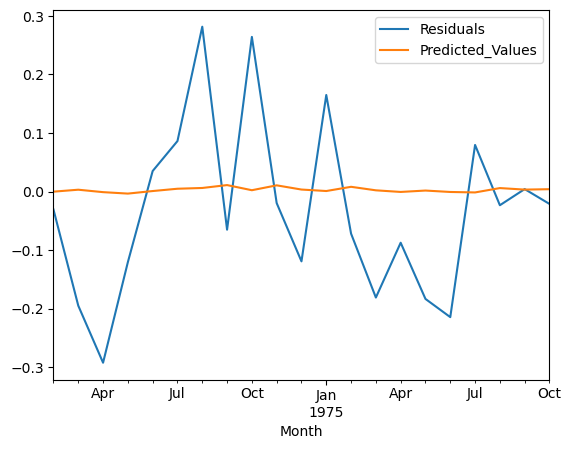

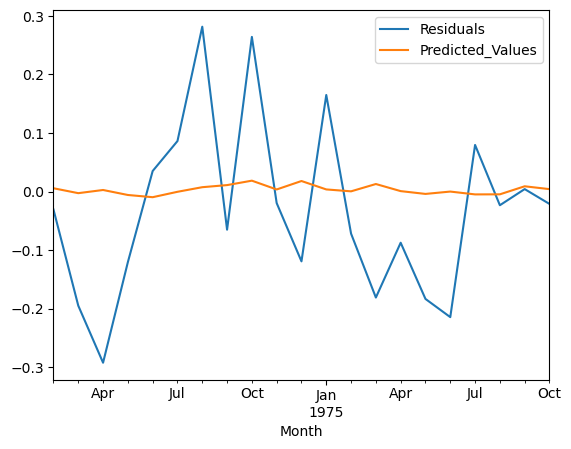

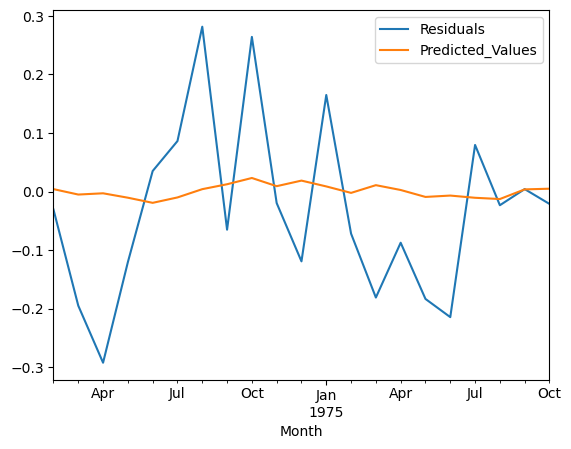

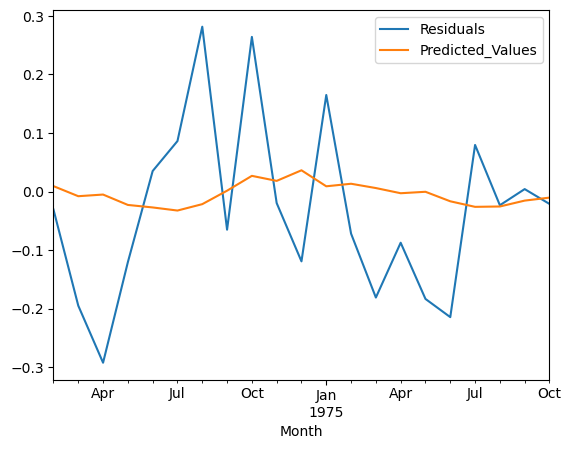

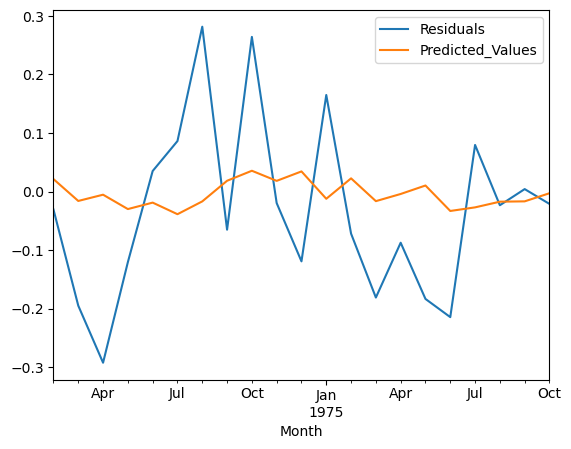

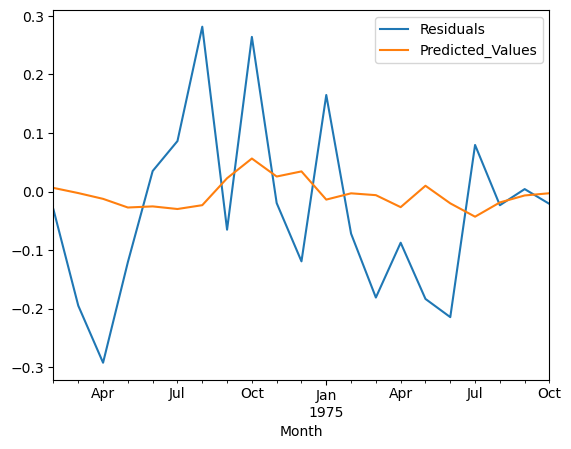

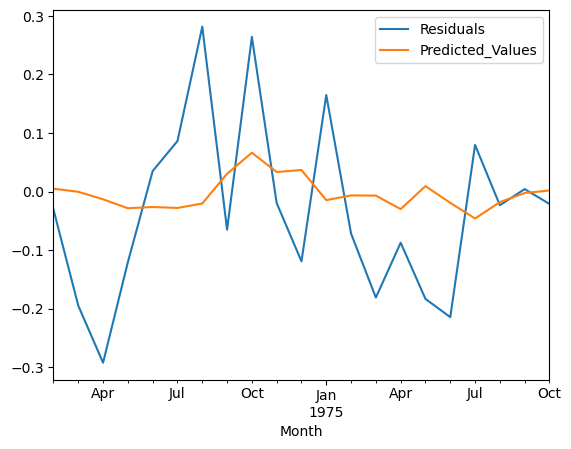

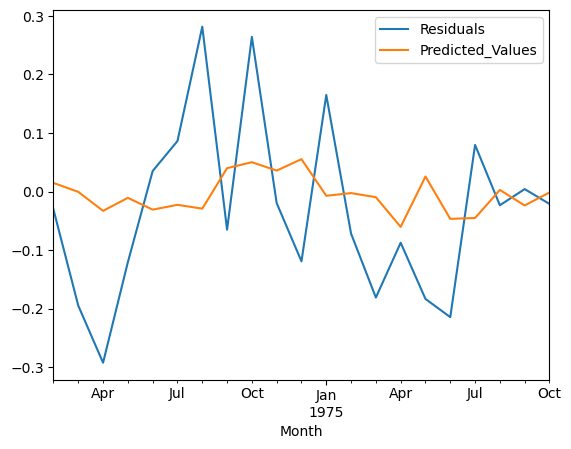

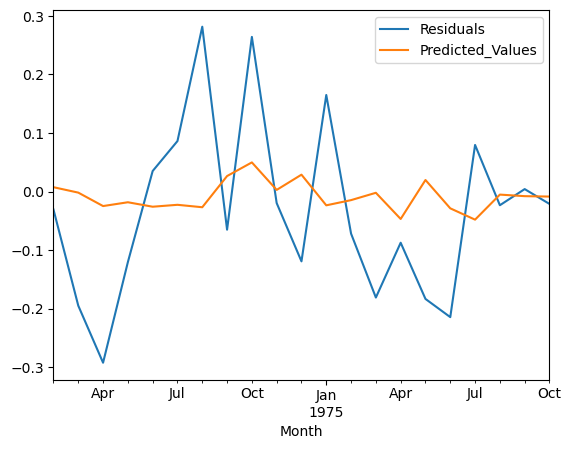

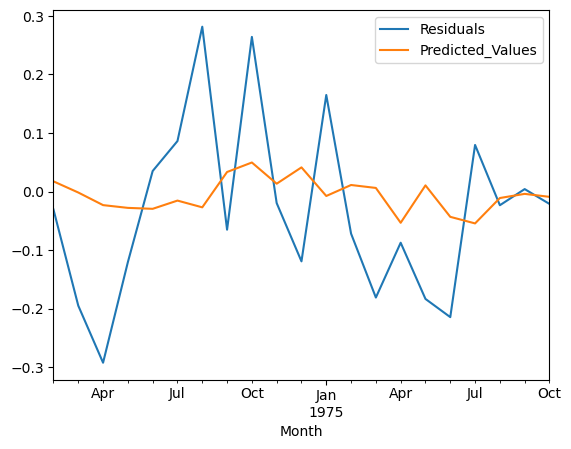

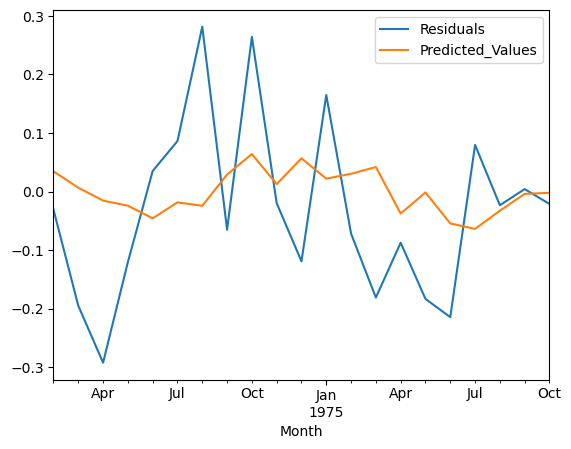

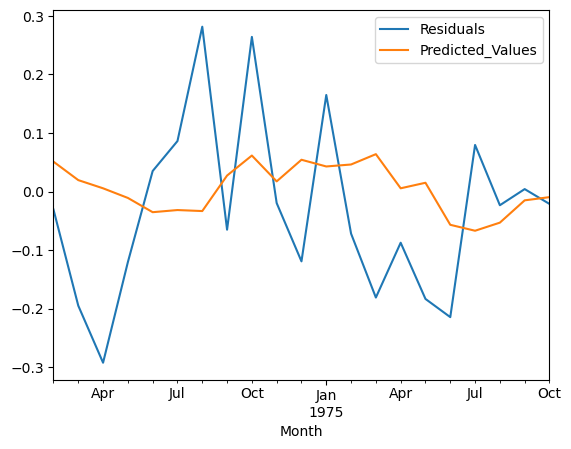

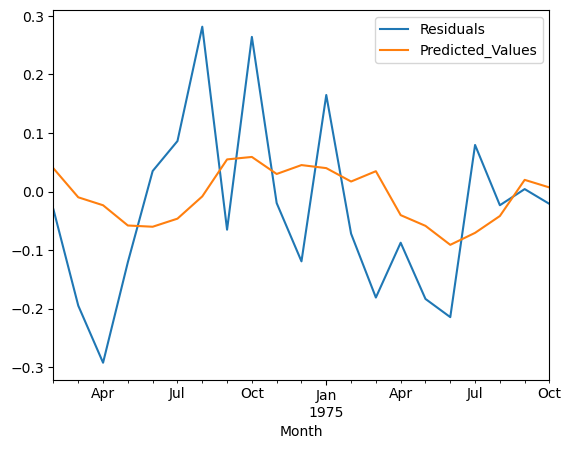

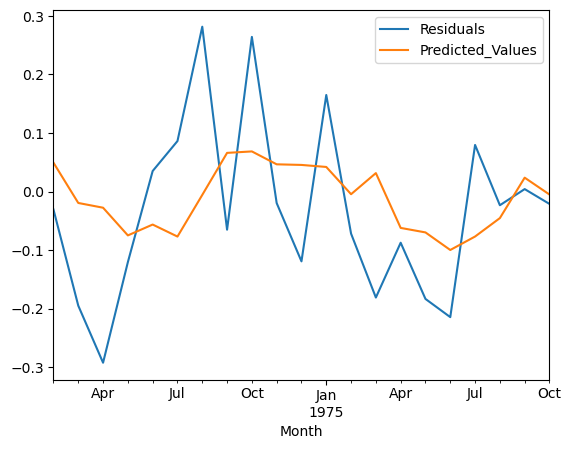

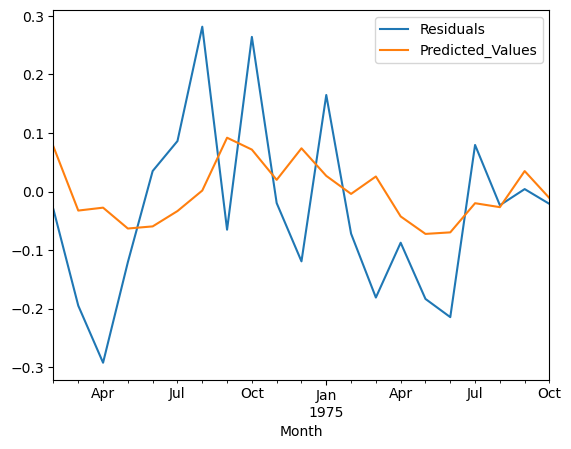

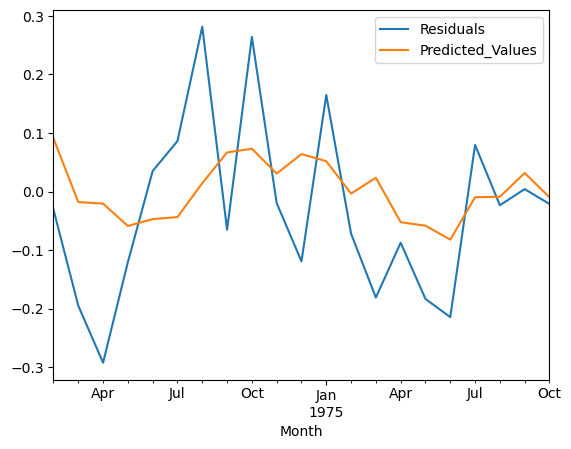

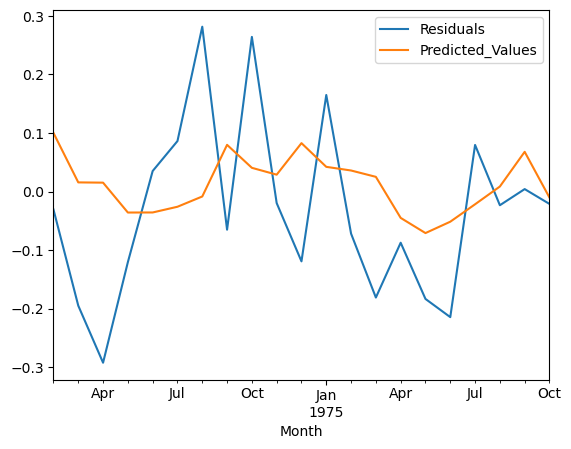

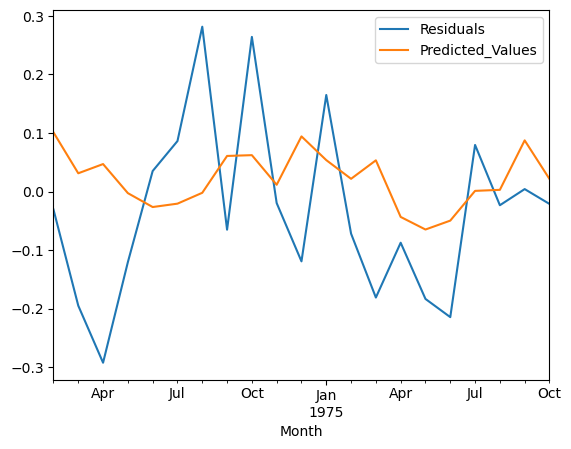

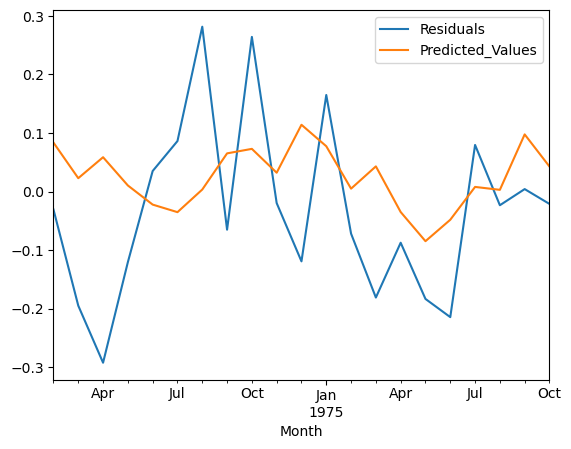

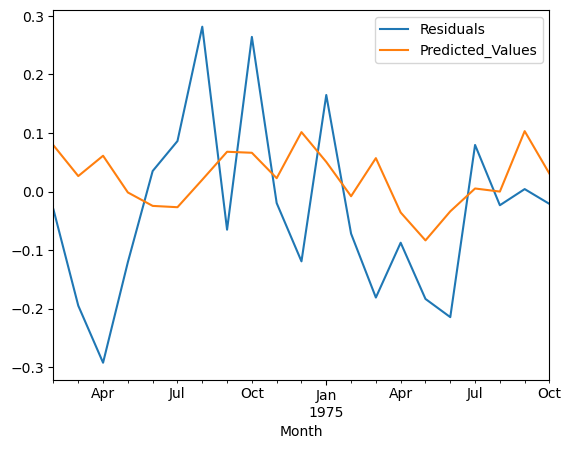

In [47]:
for i in range(1,21):
    
  [res_train,res_test,theta,intercept,RMSE] = MA(i,pd.DataFrame(res.Residuals))
                                                                


The RMSE is : 0.14325877883574642 , Value of q :  14
[[-0.06173609]
 [ 0.1762851 ]
 [ 0.15232156]
 [ 0.05487879]
 [-0.14411615]
 [-0.09683871]
 [ 0.07886481]
 [-0.01072731]
 [-0.07334565]
 [-0.13938804]
 [-0.06790993]
 [ 0.02631606]
 [ 0.17094811]
 [-0.06363861]]
[-0.00615052]


C:\Users\user\AppData\Local\Temp\ipykernel_10256\1990097179.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_


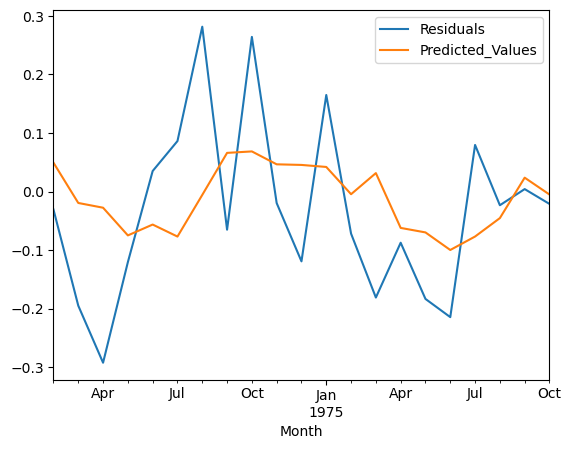

In [48]:
[res_train,res_test,theta,intercept,RMSE] = MA(14,pd.DataFrame(res.Residuals))
print(theta)
print(intercept)
     

In [49]:
res1 = pd.concat([res_train,res_test])

In [50]:
res1

,Residuals,Shifted_values_1,Shifted_values_2,Shifted_values_3,Shifted_values_4,Shifted_values_5,Shifted_values_6,Shifted_values_7,Shifted_values_8,Shifted_values_9,Shifted_values_10,Shifted_values_11,Shifted_values_12,Shifted_values_13,Shifted_values_14,Predicted_Values
Month,,,,,,,,,,,,,,,,
1968-06-01,-0.077624,0.096433,0.324619,-0.146944,-0.234147,-0.145554,0.363342,0.193695,-0.034234,0.126262,0.076239,0.110921,0.050629,-0.103740,-0.479706,-0.001971
1968-07-01,0.349032,-0.077624,0.096433,0.324619,-0.146944,-0.234147,-0.145554,0.363342,0.193695,-0.034234,0.126262,0.076239,0.110921,0.050629,-0.103740,0.129351
1968-08-01,0.261748,0.349032,-0.077624,0.096433,0.324619,-0.146944,-0.234147,-0.145554,0.363342,0.193695,-0.034234,0.126262,0.076239,0.110921,0.050629,0.019333
1968-09-01,0.033440,0.261748,0.349032,-0.077624,0.096433,0.324619,-0.146944,-0.234147,-0.145554,0.363342,0.193695,-0.034234,0.126262,0.076239,0.110921,-0.058797
1968-10-01,-0.124411,0.033440,0.261748,0.349032,-0.077624,0.096433,0.324619,-0.146944,-0.234147,-0.145554,0.363342,0.193695,-0.034234,0.126262,0.076239,-0.004870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975-06-01,-0.214459,-0.183366,-0.087355,-0.180989,-0.071836,0.164968,-0.119176,-0.019637,0.264207,-0.065083,0.281597,0.086320,0.035114,-0.120493,-0.292332,-0.099767
1975-07-01,0.079647,-0.214459,-0.183366,-0.087355,-0.180989,-0.071836,0.164968,-0.119176,-0.019637,0.264207,-0.065083,0.281597,0.086320,0.035114,-0.120493,-0.076772
1975-08-01,-0.023327,0.079647,-0.214459,-0.183366,-0.087355,-0.180989,-0.071836,0.164968,-0.119176,-0.019637,0.264207,-0.065083,0.281597,0.086320,0.035114,-0.045304


In [51]:
df2.Predicted_Values += res1.Predicted_Values
     


<Axes: xlabel='Month'>

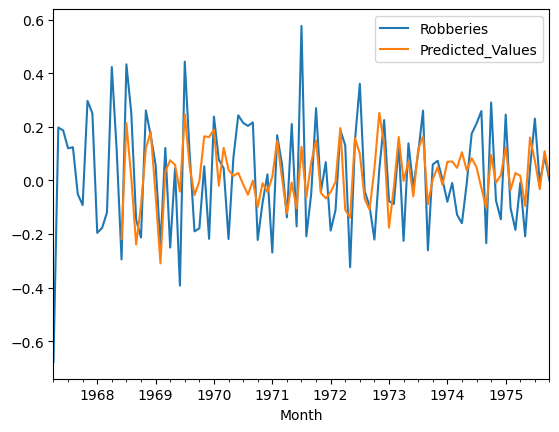

In [52]:
df2[['Robberies','Predicted_Values']].plot()

In [53]:
df2.Robberies += np.log(df).shift(1).Robberies
df2.Robberies += np.log(df).diff().shift(12).Robberies
df2.Predicted_Values += np.log(df).shift(1).Robberies
df2.Predicted_Values += np.log(df).diff().shift(12).Robberies
df2.Robberies = np.exp(df2.Robberies)
df2.Predicted_Values = np.exp(df2.Predicted_Values)
     

In [54]:
df2

,Robberies,Shifted_values_1,Shifted_values_2,Shifted_values_3,Shifted_values_4,Shifted_values_5,Shifted_values_6,Shifted_values_7,Shifted_values_8,Shifted_values_9,Shifted_values_10,Shifted_values_11,Shifted_values_12,Shifted_values_13,Shifted_values_14,Predicted_Values
Month,,,,,,,,,,,,,,,,
1967-04-01,25.600000,0.065597,0.165514,0.020203,0.524524,-0.188052,-0.108214,0.108214,-0.228842,0.146603,-0.123614,0.072321,-0.223144,0.248461,-0.050010,NaN
1967-05-01,41.925000,-0.677399,0.065597,0.165514,0.020203,0.524524,-0.188052,-0.108214,0.108214,-0.228842,0.146603,-0.123614,0.072321,-0.223144,0.248461,NaN
1967-06-01,41.534884,0.197826,-0.677399,0.065597,0.165514,0.020203,0.524524,-0.188052,-0.108214,0.108214,-0.228842,0.146603,-0.123614,0.072321,-0.223144,NaN
1967-07-01,61.368421,0.186586,0.197826,-0.677399,0.065597,0.165514,0.020203,0.524524,-0.188052,-0.108214,0.108214,-0.228842,0.146603,-0.123614,0.072321,NaN
1967-08-01,47.727273,0.120144,0.186586,0.197826,-0.677399,0.065597,0.165514,0.020203,0.524524,-0.188052,-0.108214,0.108214,-0.228842,0.146603,-0.123614,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975-06-01,376.315353,-0.208467,-0.008032,-0.184541,-0.103141,0.245901,-0.144975,-0.074582,0.291110,-0.234073,0.259109,0.212636,0.174685,-0.008265,-0.159428,422.047933
1975-07-01,492.299652,0.045315,-0.208467,-0.008032,-0.184541,-0.103141,0.245901,-0.144975,-0.074582,0.291110,-0.234073,0.259109,0.212636,0.174685,-0.008265,421.015136
1975-08-01,510.535211,0.230710,0.045315,-0.208467,-0.008032,-0.184541,-0.103141,0.245901,-0.144975,-0.074582,0.291110,-0.234073,0.259109,0.212636,0.174685,499.437503


<Axes: xlabel='Month'>

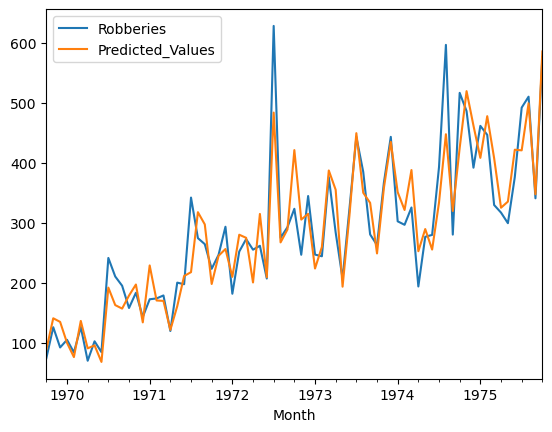

In [55]:
df2.iloc[30:,:][['Robberies','Predicted_Values']].plot()

In [56]:
vaf=df2.drop(['Shifted_values_1','Shifted_values_2','Shifted_values_3',
          'Shifted_values_4','Shifted_values_5','Shifted_values_6','Shifted_values_7','Shifted_values_8',
          'Shifted_values_9','Shifted_values_10','Shifted_values_11','Shifted_values_12','Shifted_values_13','Shifted_values_14','Predicted_Values'],axis=1)
vaf


,Robberies
Month,
1967-04-01,25.600000
1967-05-01,41.925000
1967-06-01,41.534884
1967-07-01,61.368421
1967-08-01,47.727273
...,...
1975-06-01,376.315353
1975-07-01,492.299652
1975-08-01,510.535211


In [57]:
bf=df2.drop(['Robberies','Shifted_values_1','Shifted_values_2','Shifted_values_3',
          'Shifted_values_4','Shifted_values_5','Shifted_values_6','Shifted_values_7','Shifted_values_8',
          'Shifted_values_9','Shifted_values_10','Shifted_values_11','Shifted_values_12','Shifted_values_13','Shifted_values_14'],axis=1)
bf

,Predicted_Values
Month,
1967-04-01,NaN
1967-05-01,NaN
1967-06-01,NaN
1967-07-01,NaN
1967-08-01,NaN
...,...
1975-06-01,422.047933
1975-07-01,421.015136
1975-08-01,499.437503


In [58]:
bf.head(15)

,Predicted_Values
Month,
1967-04-01,NaN
1967-05-01,NaN
1967-06-01,NaN
1967-07-01,NaN
1967-08-01,NaN
1967-09-01,NaN
1967-10-01,NaN
1967-11-01,NaN
1967-12-01,NaN


In [59]:
jk=bf[14:]
jk

,Predicted_Values
Month,
1968-06-01,90.988594
1968-07-01,97.767678
1968-08-01,123.484023
1968-09-01,103.955331
1968-10-01,99.727801
...,...
1975-06-01,422.047933
1975-07-01,421.015136
1975-08-01,499.437503


In [60]:
vf=vaf[14:]
vf

,Robberies
Month,
1968-06-01,84.358974
1968-07-01,121.787234
1968-08-01,157.358491
1968-09-01,114.000000
1968-10-01,88.491228
...,...
1975-06-01,376.315353
1975-07-01,492.299652
1975-08-01,510.535211


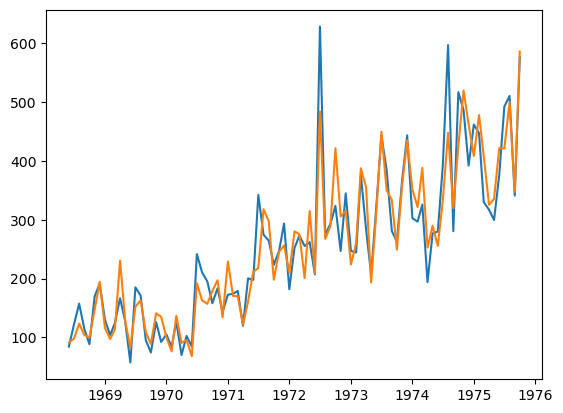

In [61]:
plt.plot(vf,)
plt.plot(jk)

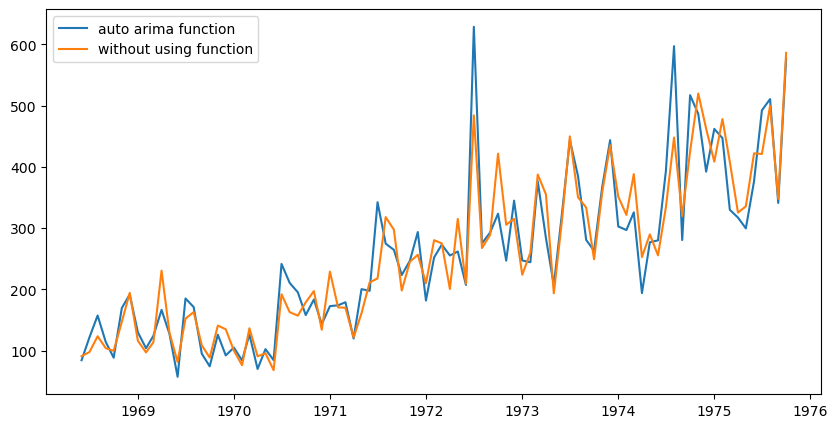

In [73]:
plt.figure(figsize=(10,5))
plt.plot(vf,label='auto arima function')
plt.plot(jk,label='without using function')
plt.legend(loc='upper left')
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(vf['Robberies'],jk['Predicted_Values']))

print('RMSE:',rmse)

RMSE: 43.56769699435216


In [63]:
from sklearn.metrics import mean_absolute_percentage_error

mape=mean_absolute_percentage_error(vf['Robberies'],jk['Predicted_Values'])

print('MAPE:',mape)

MAPE: 0.1299669604667871
